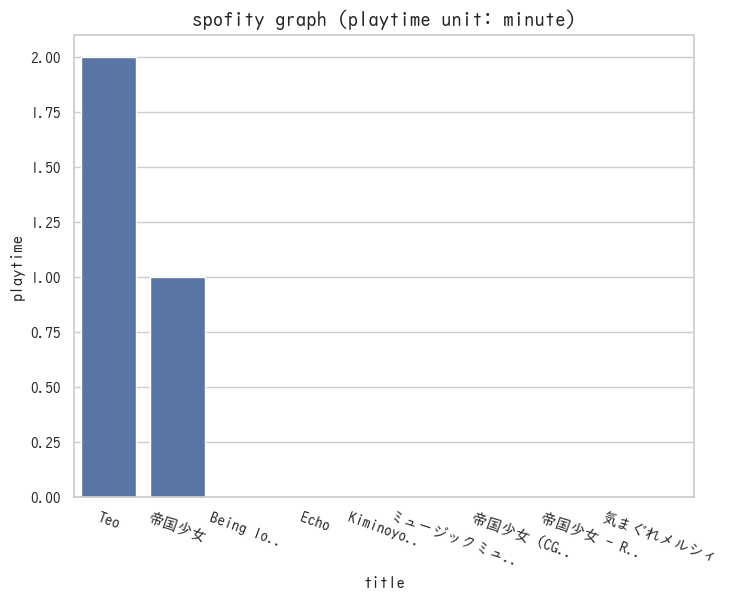

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from tkinter import *
from tkinter import filedialog
import tkinter.ttk as ttk
from tkcalendar import *
import seaborn as sns
import tkinter.font as tkFont
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from numba import jit

win=Tk()
win.geometry("1600x900")
win.title("나의 차트")
win.option_add("*font","NotoSansKR 25 bold")
fontStyle = tkFont.Font(family="NotoSansKR", size=25,)
file_path=[]
filename=[]
파일목록박스=None


def openfile():
    global file_path
    file_path.append(filedialog.askopenfilename())
    frame = Frame(win)
    frame.place(x=1400,y=391,width=200,height=260)

    
    for s in file_path:
        reverse_name = ''
        for c in s:
            reverse_name = c + reverse_name
        a=reverse_name.find('/')
        global filename,파일목록박스
        filename.append(s[-a:])
        파일목록박스=Listbox(frame,bg='white',relief=GROOVE,font=('NotoSansKR',15,'bold'),)
        
        for t in filename:
            if t not in 파일목록박스.get(0,END):
                파일목록박스.insert(END,t)
    파일목록박스.pack(side='left')
    
    

    


font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/UDDigiKyokashoN-R.ttc").get_name()
rc('font', family=font_name)

class Song:
    def __init__(self,title) -> None:
        self.title=title
        self.pltime=0
        self.singer=None
        
        self.plnum=0
    def __eq__(self,other):
        if self.title==other.title:
            return True
        else:
            return False

상태메시지='파일과 x,y축을 설정해주세요.'
메시지라벨=Label(win,text=상태메시지)
메시지라벨.config(font=('NotoSansKR',15,'bold'),bg='white',relief=GROOVE,fg='black')
메시지라벨.place(x=922,y=0,width=300,height=100)


songlist=[]
title=[]
pltime=[]
singer=[]

plnum=[]
data=None
songframe=None
content=''

def startsetting():
        global 상태메시지, 메시지라벨
        

        songlist=[]
        title=[]
        pltime=[]
        singer=[]
       
        plnum=[]
        for z in file_path:
            f1=open(z,'r',encoding='UTF8')
            global content
            content+=('\n'+f1.read())
            f1.close()
        aaaa=content.count('\n')

        for t in range((aaaa//22)):
                if content.find('"master_metadata_track_name": "')!=-1:
                    s_date_index=content.find('"ts": "')+7
                    abc=content.find('T',s_date_index)
                    s_date_str=content[s_date_index:abc]
                    s_date=''
                    for y in s_date_str:
                        if y.isdigit():
                            s_date+=y
                    s_date=int(s_date)
                    content=content.replace('"ts": "','',1)
                    
                    if s_date >= startdate and s_date <= enddate:
                        s_name_index=content.find('"master_metadata_track_name": "')
                        a=content.find('",\n',s_name_index)
                        songlist.append(Song(f'{content[s_name_index+31:a]}'))
                        s_pt_index=content.find('"ms_played": ')
                        b=content.find(',',s_pt_index)
                        songlist[t].pltime+=int(content[s_pt_index+13:b])
                        s_singer_index=content.find('artist_name": "')
                        c=content.find('",\n',s_singer_index)
                        songlist[t].singer=content[s_singer_index+15:c]
        
                        songlist[t].plnum+=1


                        content=content.replace('"master_metadata_track_name": "','',1)
                        content=content.replace('"ms_played": ','',1)
                        content=content.replace('artist_name": "','',1)
                        
        for s in songlist:
            title.append(s.title)
            singer.append(s.singer)
            plnum.append(s.plnum)
            pltime.append(s.pltime//60000)
          
        global data
        data={'title':title,'singer':singer,'playtime':pltime,'playnumber':plnum}
        global songframe
        songframe=pd.DataFrame(data)
        상태메시지='그래프 출력이 준비되었습니다!'
        메시지라벨=Label(win,text=상태메시지)
        메시지라벨.config(font=('NotoSansKR',15,'bold'),bg='white',relief=GROOVE,fg='black')
        메시지라벨.place(x=922,y=0,width=300,height=100)

def test():
    pd.set_option('display.max_rows',None)
    display(songframe)





def show_graph():
        global songframe
        
        sns.set(style="whitegrid")
        plt.figure(figsize=(8,30))
        font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/UDDigiKyokashoN-R.ttc").get_name()
        plt.rc('font', family=font_name)
        plt.xticks(rotation=-20)
        plt.title('spofity graph (playtime unit: minute)',fontsize=15)
        x축=x축설정.get()
        y축=y축설정.get()
        개수=int(개수입력.get())
        if y축!='singer' and x축=='playtime':
            agg_data3=songframe.groupby('title')['playtime'].sum().reset_index().sort_values(x축,ascending=False).head(개수)
            atitle=[]
            for t in agg_data3['title'].tolist():
                processed_title = t[:8]+'..' if len(t) > 8 else t
                atitle.append(processed_title)
            agg_data3.drop('title',axis=1)
            agg_data3['title']=atitle
            barplot=sns.barplot(data=agg_data3, x=y축, y=x축)
            for widget in 그래프화면.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(barplot.get_figure(), master=그래프화면)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(fill=BOTH,expand=YES)
        elif y축!='singer' and x축=='playnumber':
            agg_data4=songframe.groupby('title')['playnumber'].sum().reset_index().sort_values(x축,ascending=False).head(개수)
            atitle=[]
            for t in agg_data4['title'].tolist():
                processed_title = t[:8]+'..' if len(t) > 8 else t
                atitle.append(processed_title)
            agg_data4.drop('title',axis=1)
            agg_data4['title']=atitle
            barplot=sns.barplot(data=agg_data4, x=y축, y=x축)
            for widget in 그래프화면.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(barplot.get_figure(), master=그래프화면)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(fill=BOTH,expand=YES)
            
        elif y축=='singer' and x축=='playtime':
            agg_data1=songframe.groupby('singer')['playtime'].sum().reset_index().sort_values(x축,ascending=False).head(개수)
            barplot=sns.barplot(data=agg_data1,x=y축,y=x축)
            for widget in 그래프화면.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(barplot.get_figure(), master=그래프화면)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(fill=BOTH,expand=YES)
        elif y축=='singer' and x축=='playnumber':
            agg_data2=songframe.groupby('singer')['playnumber'].sum().reset_index().sort_values(x축,ascending=False).head(개수)
            barplot=sns.barplot(data=agg_data2, x=y축, y=x축)
            for widget in 그래프화면.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(barplot.get_figure(), master=그래프화면)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(fill=BOTH,expand=YES)
            

        

def file_delete():
    삭제튜플=파일목록박스.curselection()
    파일목록박스.delete(삭제튜플[0])
    file_path.pop(삭제튜플[0])
    filename.pop(삭제튜플[0])





#날짜받기
f1=Label(win,text='시작 날짜', font=('tahoma',15,'bold'),relief= SUNKEN,bg='white',fg='black')
f1.place(x=320,y=0,width=200,height=50)

f2=Frame(win,relief=SUNKEN,bd=4,bg='white',)
f2.place(x=320,y=50,width=200,height=50)

cal=DateEntry(f2,background='black',foreground='white',borderwidth=2,)
cal.place(x=0,y=0,width=195,height=50)

f3=Label(win,text='종료 날짜', font=('tahoma',15,'bold'),relief= SUNKEN,bg='white',fg='black')
f3.place(x=620,y=0,width=200,height=50)

f4=Frame(win,relief=SUNKEN,bd=4,bg='white',)
f4.place(x=620,y=50,width=200,height=50)

물결표라벨=Label(win,text='~',font=('tahoma',25,'bold'),relief= SUNKEN)
물결표라벨.place(x=520,y=0,width=100,height=100)

dal=DateEntry(f4,background='black',foreground='white',borderwidth=2)
dal.place(x=0,y=0,width=200,height=50)


파일추가버튼=Button(win)
파일추가버튼.config(text="파일\n추가",pady=9,font=('NotoSansKR',15,'bold'))
파일추가버튼.config(command=openfile)
파일추가버튼.place(x=1400,y=651,width=200,height=50)

파일삭제버튼=Button(win)
파일삭제버튼.config(text="파일\n삭제",pady=9,font=('NotoSansKR',15,'bold'),command=file_delete)
파일삭제버튼.place(x=1400,y=701,width=200,height=50)

파일목록라벨=Label(win)
파일목록라벨.config(text='추가된 파일 목록',bg='white',font=('NotoSansKR',15,'bold'),relief=SUNKEN)
파일목록라벨.place(x=1400,y=351,width=200,height=40)


startdate=20001111
enddate=25001212
def date_grab():
    global startdate,enddate
    startstr=str(cal.get_date())
    endstr=str(dal.get_date())
    startdate=''
    for y in startstr:
        if y.isdigit():
            startdate+=y
    startdate=int(startdate)
    enddate=''
    for y in endstr:
        if y.isdigit():
            enddate+=y
    enddate=int(enddate)
    

   


셋팅버튼=Button(win,text='셋팅')
셋팅버튼.config(command=startsetting)
셋팅버튼.place(x=1222,y=0,width=178,height=100)

그래프버튼=Button(win,text='그래프 출력')
그래프버튼.config(command=show_graph)
그래프버튼.place(x=1400,y=0,width=200,height=50)

그래프화면=Label(win,bg='white')
그래프화면.place(x=0,y=100,width=1400,height=800)



테스트버튼=Button(win,text='테스트')
테스트버튼.config(command=test,)
테스트버튼.place(x=1400,y=50,width=200,height=50)

날짜완료버튼=Button(win,text='날짜\n설정\n완료')
날짜완료버튼.config(command=date_grab,font=('NotoSansKR',15,'bold'))
날짜완료버튼.place(x=822,y=0,width=100,height=100)


설정라벨=Label(win,text='그래프 설정',font=('NotoSansKR',20,'bold'))
설정라벨.config(bg='white',relief=RIDGE,bd=6)
설정라벨.place(x=1400,y=100,width=200,height=60)

x축리스트=['playtime','playnumber']
x축설정=ttk.Combobox(win,values=x축리스트,font=('NotoSansKR',20,'bold'),)
x축설정.set('x축 설정')
x축설정.place(x=1401,y=160,width=199,height=50)

y축리스트=['title','singer']
y축설정=ttk.Combobox(win,values=y축리스트,font=('NotoSansKR',20,'bold'),)
y축설정.set('y축 설정')
y축설정.place(x=1401,y=210,width=199,height=50)

y값출력개수=Label(text='y값 출력 개수')
y값출력개수.config(font=('NotoSansKR',15,'bold'),bg='white',relief=SUNKEN)
y값출력개수.place(x=1401,y=260,width=200,height=60)


개수입력=Entry(win)
개수입력.config(font=('NotoSansKR',15,),relief=SUNKEN)
개수입력.place(x=1400,y=320,width=200,height=30)
개수입력.insert(0, "10")

def 엑셀화():
    songframe.to_excel('스포티파이 사용표.xlsx',index=False)


엑셀버튼=Button(win)
엑셀버튼.config(text='엑셀 표 출력하기',font=('NotoSansKR',15,'bold'),command=엑셀화)
엑셀버튼.place(x=0,y=0,width=200,height=100)




win.mainloop()




